# scikit-learn API

**Documentation** 
- https://towardsdatascience.com/scikit-learn-design-principles-d1371958059b
- http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/
- https://scikit-learn.org/stable/developers/develop.html

Scikit-Learn is a powerful, rich, and extensive Python library for implementing machine learning. The library provides tools for modeling (e.g., classification, regression, and clustering algorithms), model selection (e.g., grid search), preprocessing (e.g., feature extraction), and more. 

The success of the library has as much to do with its interface and ease of use, as it does with its powerful and profound functionality.

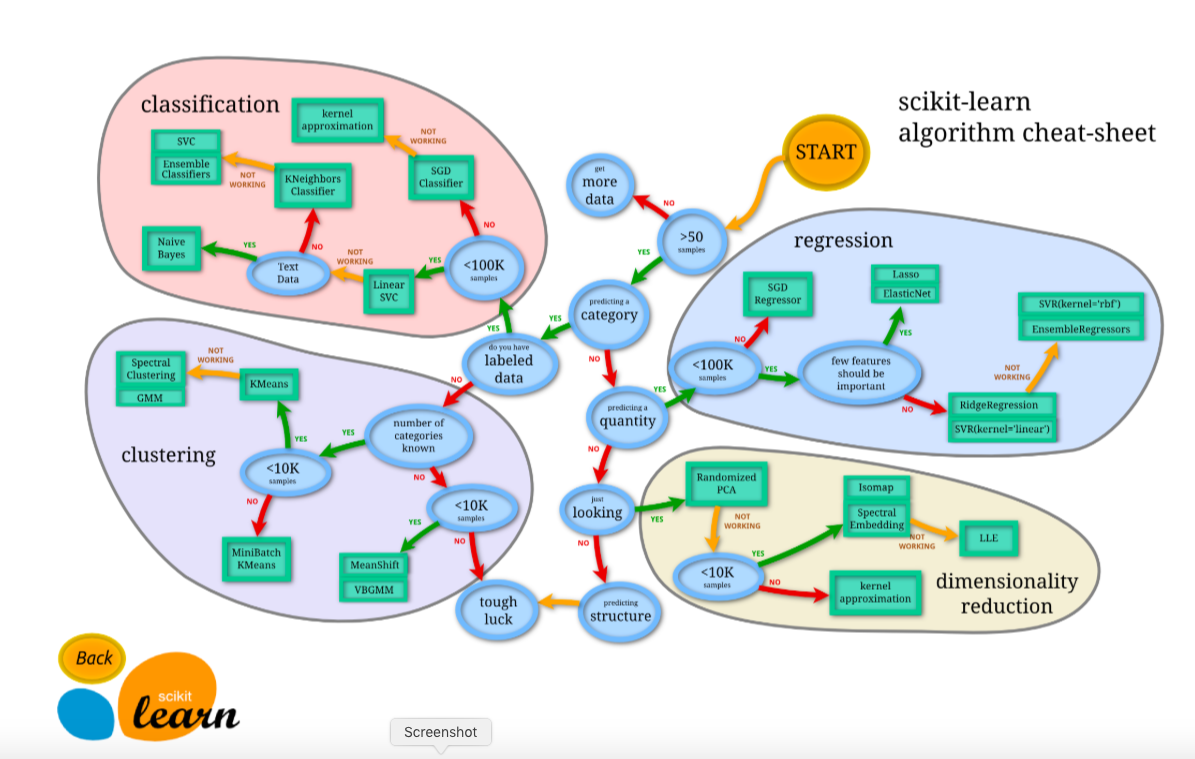

**Interfaces**

The library is organized around three fundamental APIs (interfaces): Estimator, Predictor, and Transformer. Importantly and crucially these interfaces are complimentary — they do not represent hard boundaries between classes or precise semantic separation, but rather an overlap. For example, the DecisionTree classifier is both an Estimator and a Predictor. The main objects in scikit-learn are (one class can implement multiple interfaces):
 

**Estimator**

    The base object, implements a fit method to learn from data, either:

    * estimator = estimator.fit(data, targets)

    or:

    * estimator = estimator.fit(data)

**Predictor**

    For supervised learning, or some unsupervised problems, implements:

    * prediction = predictor.predict(data)

    Classification algorithms usually also offer a way to quantify certainty of a prediction, either using decision_function or predict_proba:

    *probability = predictor.predict_proba(data)
    
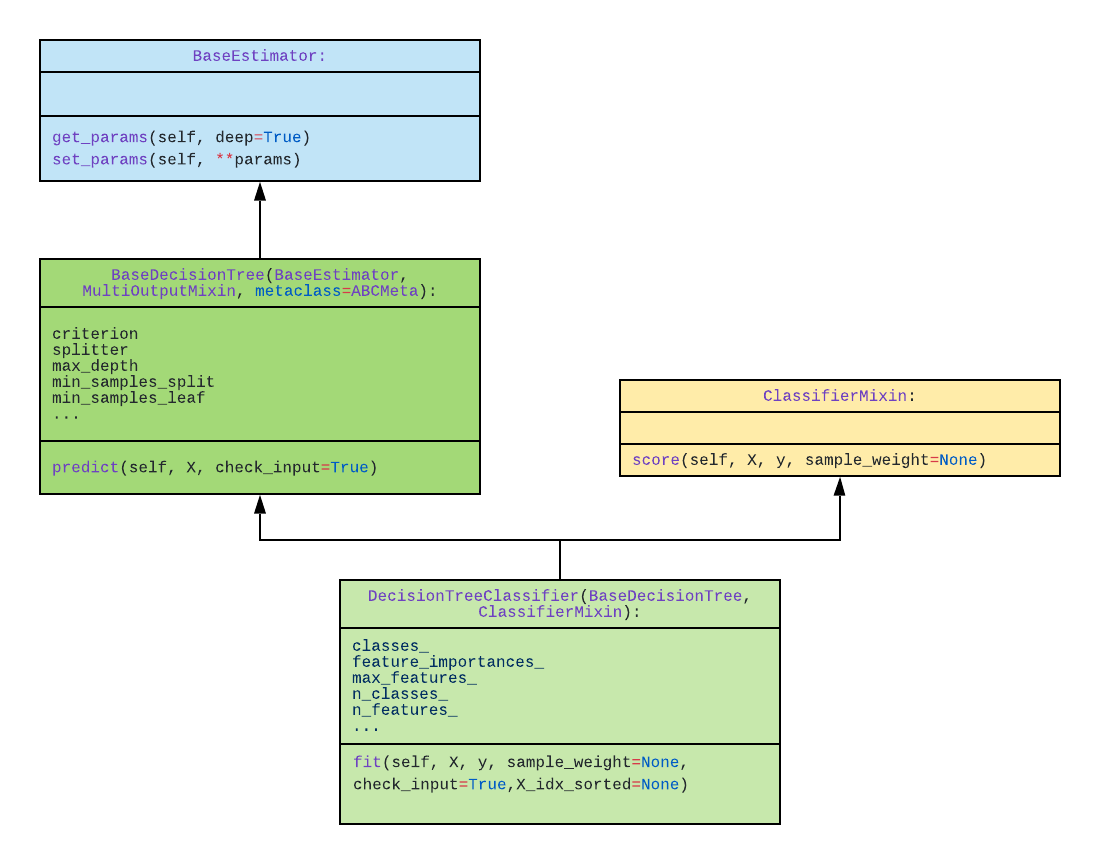


All estimators must have get_params and set_params functions. They are inherited when you subclass BaseEstimator and I would recommend not to override these function (just not state them in definition of your classifier).

**Transformer**

    For filtering or modifying the data, in a supervised or unsupervised way, implements:

    * new_data = transformer.transform(data)

    When fitting and transforming can be performed much more efficiently together than separately, implements:

    * new_data = transformer.fit_transform(data)
    
    
    
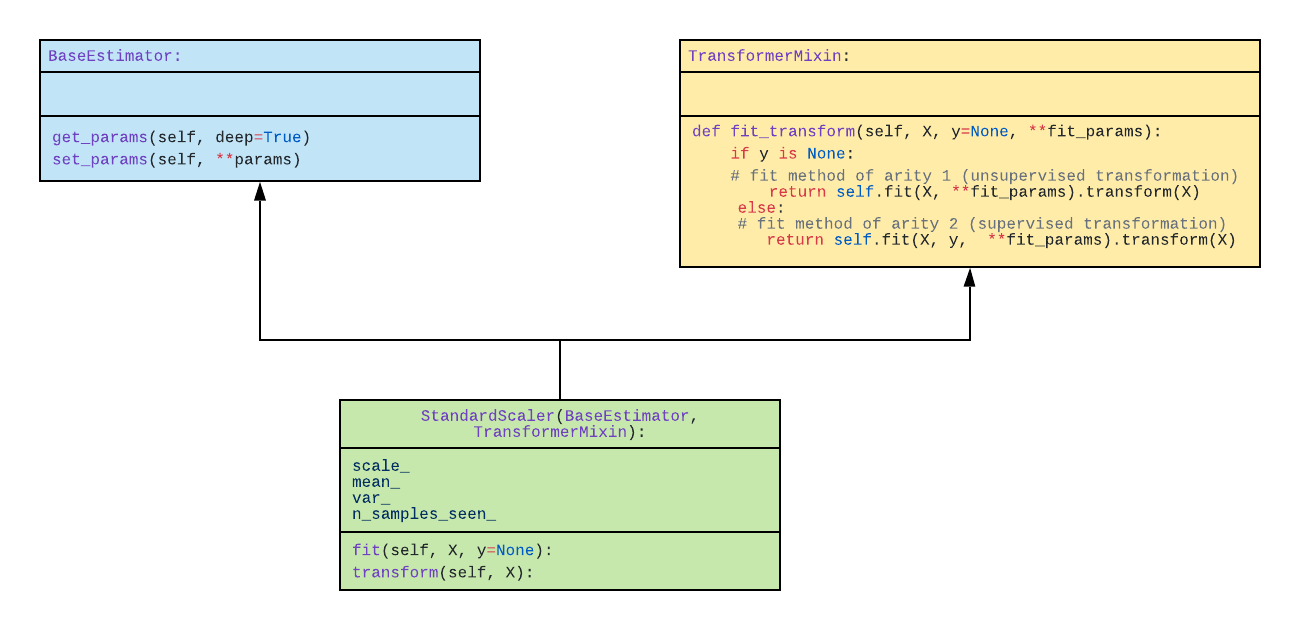

**Model**

    A model that can give a goodness of fit measure or a likelihood of unseen data, implements (higher is better):

    * score = model.score(data)


## Example 1

In [77]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances



class TemplateClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param
        print(self.get_params())

    def fit(self, X, y):

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        # Return the classifier
        return self

    def predict(self, X_test):

        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X_test = check_array(X_test)

        closest = np.argmin(euclidean_distances(X_test, self.X_), axis=1)
        return self.y_[closest]
    
      def fit_predict(Self,data):
            pass

{'demo_param': 'demo'}


array([1])

In [79]:
df = pd.DataFrame(data=np.arange(40).reshape(20,2), columns=['A','B'])
df['Y'] =np.arange(20).reshape(20,)
df

,A,B,Y
0,0,1,0
1,2,3,1
2,4,5,2
3,6,7,3
4,8,9,4
5,10,11,5
6,12,13,6
7,14,15,7
8,16,17,8
9,18,19,9


In [90]:

a = TemplateClassifier()

_ = a.fit(df[['A','B']][:15],df['Y'][:15])


{'demo_param': 'demo'}


In [91]:
P = a.predict(df[['A','B']][15:])
P

array([14, 14, 14, 14, 14])

## Example 2:

In [29]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MeanClassifier(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""

    def __init__(self, intValue=0, stringParam="defaultValue", otherParam=None):
        """
        Called when initializing the classifier
        """
        self.intValue = intValue
        self.stringParam = stringParam

        # THIS IS WRONG! Parameters should have same name as attributes
        self.differentParam = otherParam 


    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.

        Note: assert is not a good choice here and you should rather
        use try/except blog with exceptions. This is just for short syntax.
        """

        self.treshold_ = (sum(X)/len(X)) + self.intValue  # mean + intValue

        return self

    def _meaning(self, x):
        # returns True/False according to fitted classifier
        # notice underscore on the beginning
        return( True if x >= self.treshold_ else False )

    def predict(self, X, y=None):
        
        # Check is fit had been called
        check_is_fitted(self)

        return([self._meaning(x) for x in X])

    def score(self, X, y=None):
        # counts number of values bigger than mean
        return(sum(self.predict(X))) 

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [30]:
a.shape

(10,)

In [101]:
dt = DecisionTreeClassifier()
dt.fit(df[['A','B']],df['Y'])
dt.predict(df[['A','B']])
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

# Pipeline

In [102]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import time 

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


startT = time.time()

train_df = pd.read_csv('../../dataset/titanic/train.csv')
#test_df = pd.read_csv('.\\titanic\\test.csv')

X = train_df[['Fare']]
y = train_df['Survived']


In [103]:

#++++++++++++++++++++++++++++++++
# create the pipeline object
#++++++++++++++++++++++++++++++++
steps = [('scaler', StandardScaler()), ('DT', DecisionTreeClassifier())]
pipeline = Pipeline(steps)


#++++++++++++++++++++++++++++++++++++++
#+ create the hyperparameter space
#++++++++++++++++++++++++++++++++++++++

parameteres = {'DT__max_leaf_nodes':range(2,10), 'DT__max_depth':range(2,10)}

#++++++++++++++++++++++++++++++++++++
#+ create train and test sets
#++++++++++++++++++++++++++++++++++++

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=30)



In [105]:
#print X_test.shape

#++++++++++++++++++++++++++++++
#+ Grid Search Cross Validation
#++++++++++++++++++++++++++++++
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)

_ = grid.fit(X_train, y_train)

print ("score = %3.2f" %(grid.score(X_test,y_test)))


print (grid.best_params_)
endT = time.time()

print ("total time elapsed = %3.3f"%(endT-startT))



score = 0.66
{'DT__max_depth': 4, 'DT__max_leaf_nodes': 5}
total time elapsed = 856.482


In [ ]:
grid.s